This is my Second end to end Deep learning Project which uses Deep learning Model of Convutational Neural Network

Seeding for Reproductivility

In [22]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)


Importing the Dependecies 

In [23]:
import os
import json
from zipfile import ZipFile
from PIL import Image 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import layers,models
import keras
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


In [25]:
kaggle_info = json.load(open('kaggle.json'))

In [26]:
os.environ['Kaggle_Username'] = kaggle_info['username']
os.environ['Kaggle_Key'] = kaggle_info['key']

In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\shubh\.cache\kagglehub\datasets\abdallahalidev\plantvillage-dataset\versions\3


In [ ]:
with ZipFile('plantvillage-dataset.zip','r') as zip_ref:
    zip_ref.extractall() 

In [29]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])


['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


No. of classes = 38

In [30]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])


423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


Data Preprocessing

In [31]:
base_dir = "C:/Users/shubh/Plant Disease Classifier/plantvillage dataset/color"

In [32]:
from PIL import Image, UnidentifiedImageError
import os

def validate_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            path = os.path.join(root, file)
            try:
                img = Image.open(path)
                img.verify()  # Check if it's an image
            except (UnidentifiedImageError, IOError):
                print(f"Removing invalid image: {path}")
                os.remove(path)

# Replace these paths with your dataset directories
validate_images(base_dir)
validate_images(base_dir)

(256, 256, 3)


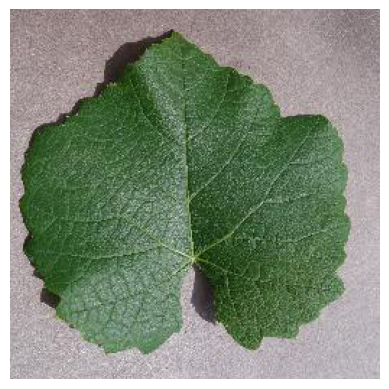

In [33]:
image_path = 'C:/Users/shubh/Plant Disease Classifier/plantvillage dataset/color\Grape___healthy/0c1667a2-61d7-4dee-b4d9-0d141a1ceb20___Mt.N.V_HL 9127.JPG'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()


Train Test Split

In [34]:
image_size = 224
batch_size= 64

In [35]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [36]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size= (image_size,image_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43454 images belonging to 38 classes.


In [37]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size= (image_size,image_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


CNN Model Building and training

In [38]:
cnn = models.Sequential()
#input layer 
cnn.add(layers.Conv2D(64,(3,3),activation='relu',input_shape = (image_size,image_size,3)))
cnn.add(layers.MaxPooling2D((2,2)))
#hidden layer 1 
cnn.add(layers.Conv2D(64,(3,3),activation='relu',input_shape= (image_size,image_size,3)))
cnn.add(layers.MaxPooling2D(2,2))
#hidden layer 2 
cnn.add(layers.Conv2D(32,(3,3),activation='relu',input_shape= (image_size,image_size,3)))
cnn.add(layers.MaxPooling2D(2,2))

#output layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(256,activation='relu'))
cnn.add(layers.Dense(train_generator.num_classes,activation='softmax'))


c:\Users\shubh\anaconda31\envs\deepLearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [41]:
history = cnn.fit(train_generator,
                  steps_per_epoch=train_generator.samples // batch_size ,
                  epochs= 15, validation_data=validation_generator,
                  validation_steps=validation_generator.samples // batch_size,
                  callbacks=EarlyStopping())

Epoch 1/15
678/678 ━━━━━━━━━━━━━━━━━━━━ 1053s 2s/step - accuracy: 0.8798 - loss: 0.3817 - val_accuracy: 0.8527 - val_loss: 0.4684
Epoch 2/15
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 375us/step - accuracy: 0.8594 - loss: 0.5082 - val_accuracy: 0.9394 - val_loss: 0.1670
Epoch 3/15
678/678 ━━━━━━━━━━━━━━━━━━━━ 1086s 2s/step - accuracy: 0.9344 - loss: 0.2020 - val_accuracy: 0.8959 - val_loss: 0.3280


In [43]:
cnn.save('plantdiseaseclassifier.keras')

Training vs Testing Metrics Visualization

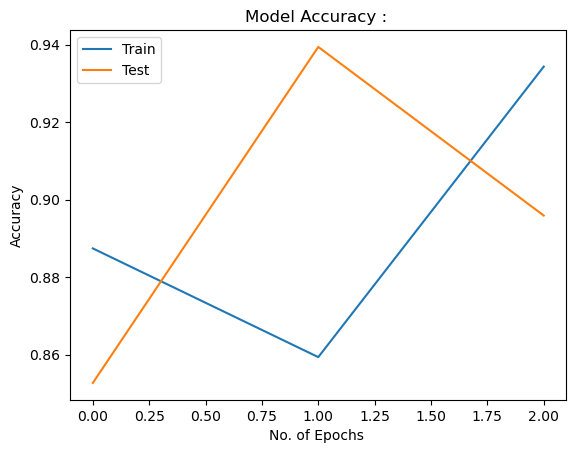

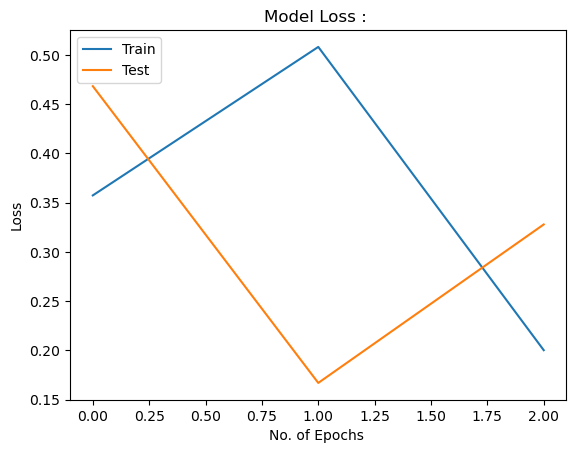

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy : ')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs ')
plt.legend(['Train','Test',],loc= 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss : ')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs ')
plt.legend(['Train','Test',],loc= 'upper left')
plt.show()